# Algorithmic Trading

**Vectorized Backtesting**

## Reading Financial Data

In [28]:
import numpy as np
import pandas as pd

In [29]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [30]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2138 non-null float64
XAU=      2138 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 217.1 KB


In [31]:
data = pd.DataFrame(raw['AAPL.O'])
data.columns = ['Close']

## Strategy Formulation

In [32]:
data['SMA1'] = data['Close'].rolling(10).mean()

In [33]:
data['SMA2'] = data['Close'].rolling(20).mean()

In [34]:
data.tail()

,Close,SMA1,SMA2
Date,,,
2018-06-25,182.17,187.610,189.2060
2018-06-26,184.43,186.825,189.0325
2018-06-27,184.16,186.171,188.8655
2018-06-28,185.50,185.641,188.7970
2018-06-29,185.11,185.268,188.5405


In [35]:
from pylab import plt
plt.style.use('ggplot')
%matplotlib inline

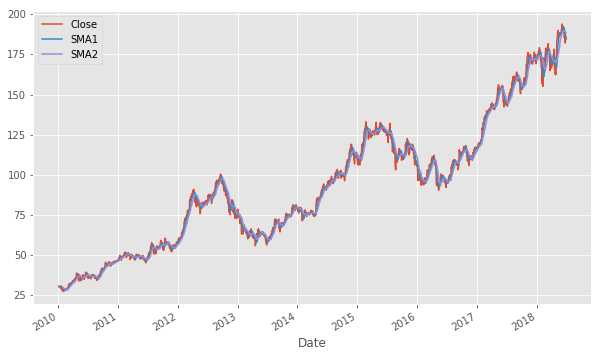

In [36]:
data.plot(figsize=(10, 6));

In [37]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

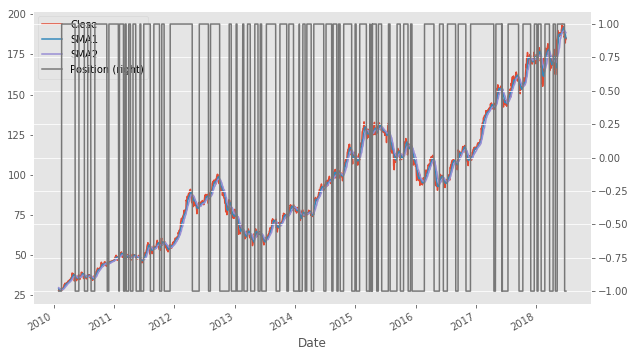

In [38]:
data.dropna().plot(figsize=(10, 6), secondary_y='Position');

## Log Returns

In [39]:
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))

In [40]:
data.head()

,Close,SMA1,SMA2,Position,Returns
Date,,,,,
2010-01-04,30.572827,NaN,NaN,-1,NaN
2010-01-05,30.625684,NaN,NaN,-1,0.001727
2010-01-06,30.138541,NaN,NaN,-1,-0.016034
2010-01-07,30.082827,NaN,NaN,-1,-0.001850
2010-01-08,30.282827,NaN,NaN,-1,0.006626


## Strategy Backtesting

In [41]:
data.dropna(inplace=True)

In [42]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [43]:
data.dropna(inplace=True)

In [44]:
data.head()

,Close,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-02-02,27.979972,28.805528,29.451249,-1,0.005786,-0.005786
2010-02-03,28.461400,28.627029,29.343035,-1,0.017060,-0.017060
2010-02-04,27.435687,28.398143,29.207892,-1,-0.036704,0.036704
2010-02-05,27.922829,28.365429,29.099892,-1,0.017600,-0.017600
2010-02-08,27.731401,28.237500,28.972321,-1,-0.006879,0.006879


In [45]:
data['CReturns'] = data['Returns'].cumsum()

In [46]:
data['CStrategy'] = data['Strategy'].cumsum()

In [47]:
data.head()

,Close,SMA1,SMA2,Position,Returns,Strategy,CReturns,CStrategy
Date,,,,,,,,
2010-02-02,27.979972,28.805528,29.451249,-1,0.005786,-0.005786,0.005786,-0.005786
2010-02-03,28.461400,28.627029,29.343035,-1,0.017060,-0.017060,0.022846,-0.022846
2010-02-04,27.435687,28.398143,29.207892,-1,-0.036704,0.036704,-0.013858,0.013858
2010-02-05,27.922829,28.365429,29.099892,-1,0.017600,-0.017600,0.003742,-0.003742
2010-02-08,27.731401,28.237500,28.972321,-1,-0.006879,0.006879,-0.003137,0.003137


In [48]:
data.tail()

,Close,SMA1,SMA2,Position,Returns,Strategy,CReturns,CStrategy
Date,,,,,,,,
2018-06-25,182.17,187.610,189.2060,-1,-0.014983,0.014983,1.879237,0.428421
2018-06-26,184.43,186.825,189.0325,-1,0.012330,-0.012330,1.891567,0.416091
2018-06-27,184.16,186.171,188.8655,-1,-0.001465,0.001465,1.890102,0.417556
2018-06-28,185.50,185.641,188.7970,-1,0.007250,-0.007250,1.897352,0.410307
2018-06-29,185.11,185.268,188.5405,-1,-0.002105,0.002105,1.895247,0.412411


In [22]:
data[['CReturns', 'CStrategy']].iloc[-1]

CReturns     1.909038
CStrategy    0.412411
Name: 2018-06-29 00:00:00, dtype: float64

In [21]:
np.exp(data[['CReturns', 'CStrategy']].iloc[-1])  # absolute performance

CReturns     6.746595
CStrategy    1.510455
Name: 2018-06-29 00:00:00, dtype: float64

In [24]:
np.exp(data[['CReturns', 'CStrategy']].iloc[-1]) - 1  # relative performance

CReturns     5.746595
CStrategy    0.510455
Name: 2018-06-29 00:00:00, dtype: float64

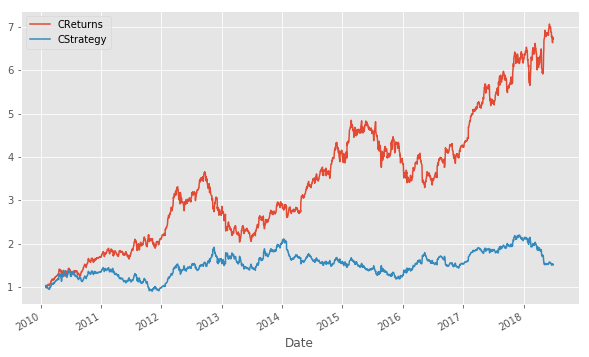

In [26]:
data[['CReturns', 'CStrategy']].apply(np.exp).plot(figsize=(10, 6));

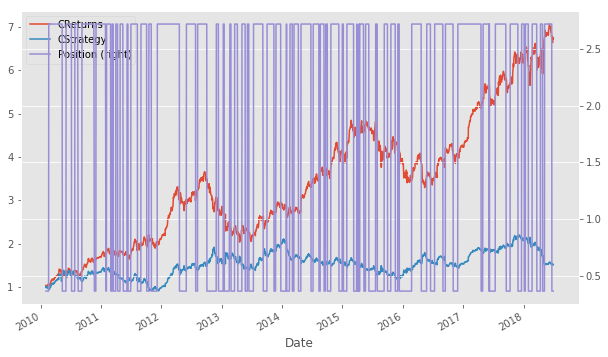

In [25]:
data[['CReturns', 'CStrategy', 'Position']].apply(np.exp).plot(
    secondary_y='Position', figsize=(10, 6));

## Transaction Costs

In [ ]:
trades = (data['Position'].diff().fillna(0) != 0)
trades.head()

In [ ]:
data[trades]  # days during which we trade (before transaction costs)

In [ ]:
tc = 0.01

In [27]:
data['Strategy'] = np.where(trades, data['Strategy'] - tc, data['Strategy'])

NameError: name 'trades' is not defined

In [ ]:
data['CStrategy'] = data['Strategy'].cumsum()  # update of cumulative log returns

In [ ]:
data[trades]  # days during which we trade (after transaction costs)

In [ ]:
np.exp(data[['CReturns', 'CStrategy']].iloc[-1])  # absolute performance

In [ ]:
data[['CReturns', 'CStrategy', 'Position']].apply(np.exp).plot(
    secondary_y='Position', figsize=(10, 6));

## Backtesting Class

In [ ]:
class SMAVectorBacktester(object):
    def __init__(self, symbol, start, end, SMA1, SMA2, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.tc = tc
        self.get_data()
    
    def get_data(self):
        raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                                  index_col=0, parse_dates=True).dropna()
        raw = pd.DataFrame(raw[self.symbol])
        raw.columns = ['Close']
        raw['SMA1'] = raw['Close'].rolling(self.SMA1).mean()
        raw['SMA2'] = raw['Close'].rolling(self.SMA2).mean()
        raw['Returns'] = np.log(raw['Close'] / raw['Close'].shift(1))
        self.data = raw.dropna()
        
    def plot_data(self):
        self.data[['Close', 'SMA1', 'SMA2']].plot(figsize=(10, 6), title=self.symbol)
        
    def run_strategy(self):
        data = self.data.copy()
        data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['Strategy'] = data['Position'].shift(1) * data['Returns']
        data.dropna(inplace=True)
        trades = (data['Position'].diff().fillna(0) != 0)
        data['Strategy'] = np.where(trades, data['Strategy'] - self.tc, data['Strategy'])
        data['CReturns'] = data['Returns'].cumsum().apply(np.exp)
        data['CStrategy'] = data['Strategy'].cumsum().apply(np.exp)
        self.results = data
        return data[['CReturns', 'CStrategy']].iloc[-1]
    
    def plot_results(self):
        self.results[['CReturns', 'CStrategy']].plot(figsize=(10, 6))

In [ ]:
sma = SMAVectorBacktester(symbol='AAPL.O', start='2010-1-1', end='2017-6-30',
                          SMA1=42, SMA2=252, tc=0.0)

In [ ]:
sma.data.head()

In [ ]:
sma.plot_data()

In [ ]:
sma.run_strategy()

In [ ]:
sma.data.head()

In [ ]:
sma.results.head()

In [ ]:
sma.plot_results()

## Comparison 

In [ ]:
sma = SMAVectorBacktester(symbol='AAPL.O', start='2012-1-1', end='2017-6-30',
                          SMA1=42, SMA2=252, tc=0.01)

In [ ]:
sma.run_strategy()

In [ ]:
sma.plot_results()

In [ ]:
sma = SMAVectorBacktester(symbol='AAPL.O', start='2012-1-1', end='2017-6-30',
                          SMA1=30, SMA2=150, tc=0.01)

In [ ]:
sma.run_strategy()

In [ ]:
sma.plot_results()

## Optimization

In [ ]:
class SMAVectorOptimizer(object):
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.get_data()
    
    def get_data(self):
        raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                                  index_col=0, parse_dates=True).dropna()
        raw = pd.DataFrame(raw[self.symbol])
        raw.columns = ['Close']
        raw['Returns'] = np.log(raw['Close'] / raw['Close'].shift(1))
        self.data = raw.dropna()
        
    def plot_data(self, cols='Close'):
        self.data[cols].plot(figsize=(10, 6), title=self.symbol)
        
    def prepare_data(self):
        self.data['SMA1'] = self.data['Close'].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data['Close'].rolling(self.SMA2).mean()
        
    def run_strategy(self, SMA1, SMA2):
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_data()
        data = self.data.dropna().copy()
        data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['Strategy'] = data['Position'].shift(1) * data['Returns']
        data.dropna(inplace=True)
        trades = (data['Position'].diff().fillna(0) != 0)
        data['Strategy'] = np.where(trades, data['Strategy'] - self.tc, data['Strategy'])
        data['CReturns'] = data['Returns'].cumsum().apply(np.exp)
        data['CStrategy'] = data['Strategy'].cumsum().apply(np.exp)
        self.results = data
        return data[['CReturns', 'CStrategy']].iloc[-1]
    
    def plot_results(self):
        self.results[['CReturns', 'CStrategy']].plot(figsize=(10, 6))

In [ ]:
smao = SMAVectorOptimizer(symbol='AAPL.O', start='2010-1-1', end='2017-6-30', tc=0.0)

In [ ]:
smao.data.info()

In [ ]:
smao.plot_data()

In [ ]:
smao.run_strategy(42, 252)

In [ ]:
smao.plot_data(['Close', 'SMA1', 'SMA2'])

### Excursion: itertools

In [ ]:
list(zip([1, 2, 3], ['a', 'b', 'c']))

In [ ]:
import itertools as it

In [ ]:
list(it.product([1, 2, 3], ['a', 'b', 'c']))

In [ ]:
list(it.product(range(10, 31, 5), range(50, 101, 10)))[:5]

### Brute Force Optimization

In [ ]:
results = pd.DataFrame()
for SMA1, SMA2 in it.product(range(30, 51, 10), range(220, 261, 10)):
    # print(SMA1, SMA2)
    res = smao.run_strategy(SMA1, SMA2)
    # print(res)
    results = results.append(pd.DataFrame({'SMA1': SMA1, 'SMA2': SMA2,
                                           'CReturns': res['CReturns'],
                                           'CStrategy': res['CStrategy']},
                                         index=[0]),
                            ignore_index=True)
results

In [ ]:
results['CStrategy'] > results['CReturns']

In [ ]:
results['CStrategy'].max()

In [ ]:
ix = results['CStrategy'].idxmax()
results.iloc[ix]

### Enhancing the Class

In [ ]:
class SMAVectorOptimizer(SMAVectorOptimizer):
    def optimize_parameters(self, SMA1_range, SMA2_range):
        self.brute_force = pd.DataFrame()
        for SMA1, SMA2 in it.product(SMA1_range, SMA2_range):
            res = self.run_strategy(SMA1, SMA2)
            self.brute_force = self.brute_force.append(
                                     pd.DataFrame({'SMA1': SMA1, 'SMA2': SMA2,
                                                   'CReturns': res['CReturns'],
                                                   'CStrategy': res['CStrategy']},
                                                 index=[0]),
                                        ignore_index=True)
        return self.brute_force.iloc[self.brute_force['CStrategy'].idxmax()]

In [ ]:
smabf = SMAVectorOptimizer(symbol='AAPL.O', start='2010-1-1', end='2017-6-30', tc=0.0)

In [ ]:
smabf.run_strategy(42, 252)

In [ ]:
smabf.optimize_parameters(range(30, 51, 10), range(220, 261, 10))

In [ ]:
smabf.brute_force

In [ ]:
%time smabf.optimize_parameters(range(20, 51, 2), range(210, 271, 2))

In [ ]:
smabf.brute_force.info()

In [ ]:
smabf.brute_force.describe()

In [ ]:
smabf.brute_force[['CReturns', 'CStrategy']].hist(figsize=(10, 6));

In [ ]:
plt.figure(figsize=(10, 6))
ax = smabf.brute_force['CReturns'].hist(bins=20)
smabf.brute_force['CStrategy'].hist(bins=30, ax=ax);

## In-Sample vs. Out-of-Sample Results

In [ ]:
# in-sample = optimization
smai = SMAVectorOptimizer(symbol='AAPL.O', start='2010-1-1', end='2014-1-1', tc=0.0)

In [ ]:
smai.optimize_parameters(range(20, 51, 5), range(210, 271, 10))

In [ ]:
# out-of-sample = testing
# taking into account the 220 days (roughly) that get cut out due to SMA2
smao = SMAVectorOptimizer(symbol='AAPL.O', start='2013-3-31', end='2017-6-30', tc=0.0)

In [ ]:
smao.run_strategy(40, 220)

In [ ]:
smao.optimize_parameters(range(20, 51, 5), range(210, 271, 10))